<a href="https://colab.research.google.com/github/weiyu1029/hello-world/blob/main/Data_Analysis_Pandas%2C_Seaborn%2C_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[colab 使用方式]

- 請先使用 **`文件>在雲端硬碟中儲存複本`**，才能在自己的環境底下更改/執行程式碼
- 點擊程式碼區塊
    - 編輯：直接在區塊內修改即可
    - 執行：前方有個類似播放鍵的按鈕，按下即可執行程式碼
- 程式碼區塊要按照順序執行

# Python vs Excel？

為什麼要學習用 python 做資料整理與分析？以 EXCEL 為例。

舉例一：Excel 難以處理字串型態的資料。


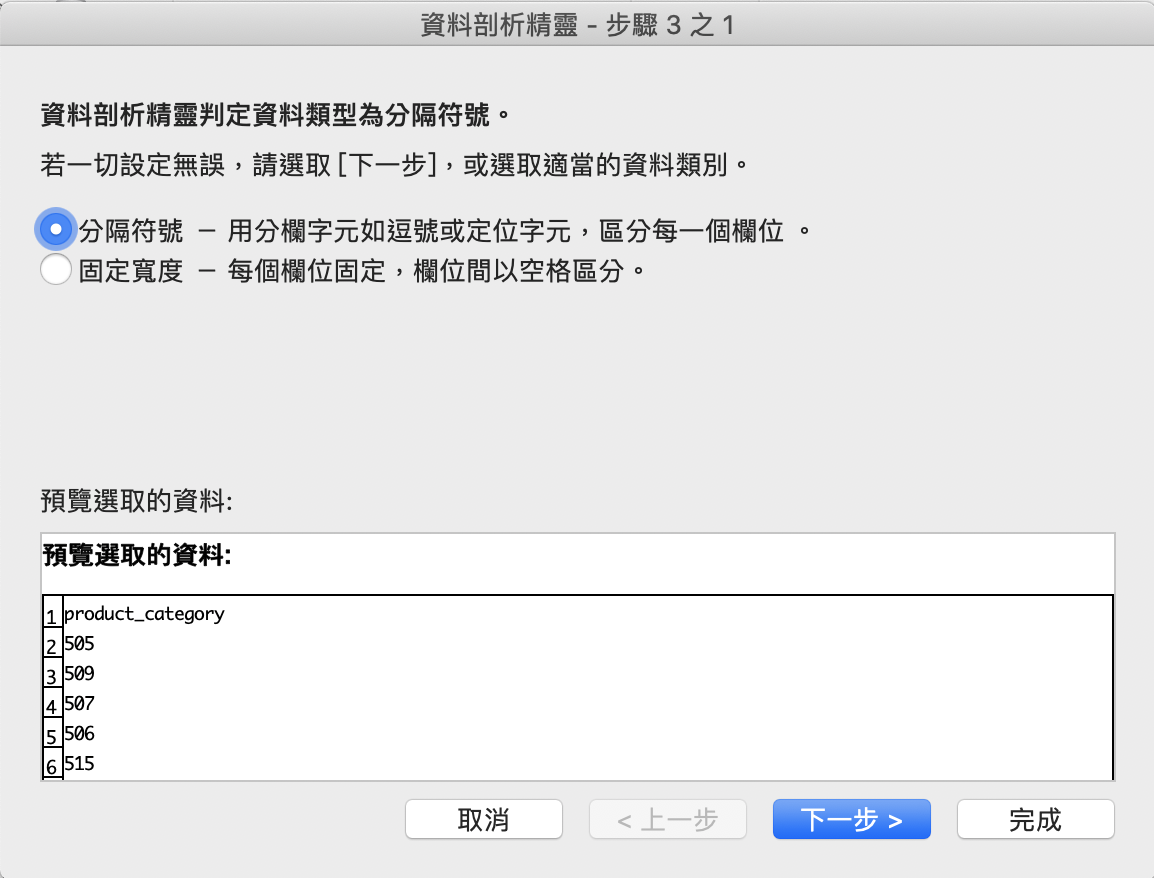

舉例二：Excel 不易合併資料表、查找資料，SQL/Python 在這部分相當方便。 

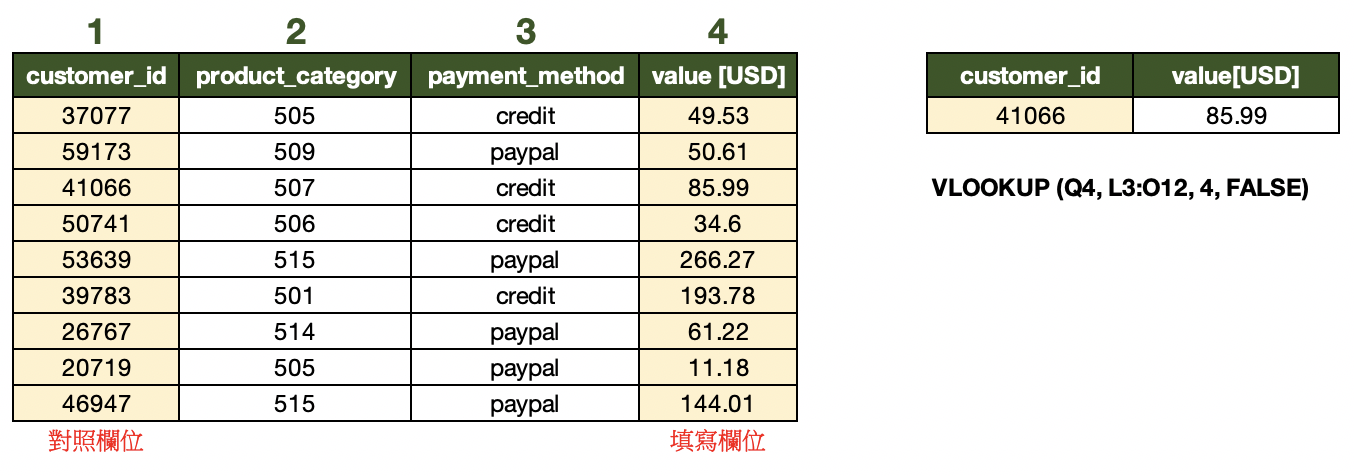

今天會教的 python 資料處理套件：


*   Pandas：資料整理、分析
*   Seaborn：資料視覺化
*   Matplotlib：資料視覺化


課程目標：

*   上半場：電商資料分析
*   下半場：資料視覺化、Airbnb分組實作




# **[Kaggle資料集](https://www.kaggle.com/raosuny/e-commerce-purchase-dataset) - 資料整理與實際應用**

## 什麼是 Kaggle？ Kaggle dataset?

In [ ]:
!gdown --id 1tNvagnlmVGfy8NaZhxFifQnG06HeUVyN

In [ ]:
import pandas as pd

In [ ]:
# 在 pandas 的世界中，表格稱為 DataFrame，一個欄位稱為 Series，換句話說，一個 DataFrame 由多個 Series 所組成。
df = pd.read_csv('kaggle_ec_data.csv')  
df

## 資料檢視與取值方法

### head(n): 取前 n 筆資料

In [ ]:
# 如果沒有自訂要秀出幾筆資料的話，預設會秀出前五筆
df.head()  

### tail(n): 取後 n 筆資料

In [ ]:
# 自訂秀出最後兩筆資料
df.tail(2)

### df['欄位名']: 取特定欄位

In [ ]:
df

In [ ]:
# 挑出單一欄位
# 在 pandas 的世界中，一個欄位稱為 Series(Index + 數值)。
df['customer_id']

In [ ]:
# 挑出多個欄位
# 在 pandas 的世界中，一個欄位稱為 Series，表格稱為 DataFrame(Index + 多個數值)，換句話說，這是一個由兩個 Series 所組成的 DataFrame。
df[['customer_id','payment_method']]

【練習題】 請依序執行上方程式碼，並嘗試印出 product_category 的欄位資訊。

## 如何理解這份[電商資料](https://www.kaggle.com/datasets/raosuny/e-commerce-purchase-dataset) 
資料範圍？ 


*   2018 年 11 月的電商購物網資料。


每一筆資料代表什麼意思？

*   一筆資料是一筆訂單記錄。

每一筆訂單記錄了哪些資訊？

*   datetime
*   order_id (自訂)
*   customer_id
*   product_category
*   payment_method
*   value[USD]
*   prod_cnt (自訂)
*   time_on_site [Minutes]
*   clicks_in_site


### info(), describe(): 資料全貌

In [ ]:
# 列出表格中有哪些欄位、資料型態、資料筆數等
df.info()

In [ ]:
# 對整張表格中，數值型的欄位進行資料描述
df.describe()

In [ ]:
# 對選定的欄位進行資料描述
df['value [USD]'].describe()

In [ ]:
# 可以用 sum(), mean(), min(), max() 來取出特定計算的值
df['value [USD]'].count()

【練習題】 請依序執行上方程式碼，並找出訂單中的商品數量最多是多少？(提示：prod_cnt) 

### nunique(): 計算不重複的數量

In [ ]:
df['customer_id'].nunique()

### nlargest(n):取 Top n

In [ ]:
# 如果沒有自訂要秀出幾筆資料的話，預設會秀出 Top 5
df['value [USD]'].nlargest()

## 電商重要指標

[電商 PM 都應了解的 5 大數據運營指標 -【數據乾貨大全】](https://medium.com/3pm-lab/ecommerce-data-driven-indicator-95bc834d0d7a)

整體：

*   【指標一】每一次下單前，客戶平均會在網站上停留多久？(欄位：time_on_site [Minutes])
*   【指標二】平均客單價(Average Order Value, AOV) = 總銷售額 / 客單數。(欄位：value [USD])
*   【指標三】每一筆訂單中，商品的平均價格？(欄位：value [USD], prod_cnt)
*   【指標四】平日/促銷日的平均客單價有沒有差異？(欄位：day_column, value [USD])

客戶：

*   【指標一】誰是 VIP 客戶？以消費額為例。(欄位：value [USD], customer_id)
*   【指標二】(圖)買家人數的逐日變化。(欄位：customer_id, datetime)

商品：

*   【指標一】最受歡迎的前三類商品？以訂單量為例。(欄位：product_category, order_id)
*   【指標二】(圖)銷售額最高的品類？(欄位：product_category, value [USD])
*   【指標三】(圖)品類銷售額的逐日變化。(欄位：product_category, value [USD], datetime)


### 【總體一】下單前停留時間

每一次下單前，客戶平均會在網站上停留幾分鐘？(欄位：time_on_site [Minutes])

In [ ]:
df.head()

In [ ]:
df['time_on_site [Minutes]'].mean()

### 【總體二】平均客單價(AOV)

【練習題】 平均客單價(AOV) = 總銷售額 / 客單數。(欄位：value [USD])

### 【總體三】訂單中商品平均價格

每一筆訂單中，商品的平均價格？(欄位：value [USD], prod_cnt)

In [ ]:
df.head()

In [ ]:
df['prod_avg_amt'] = df['value [USD]'] / df['prod_cnt']
df.head()

### 【商品一】最受歡迎的品類

#### groupby(): 分組計算

**非常重要！與各種指標的觀察息息相關。**

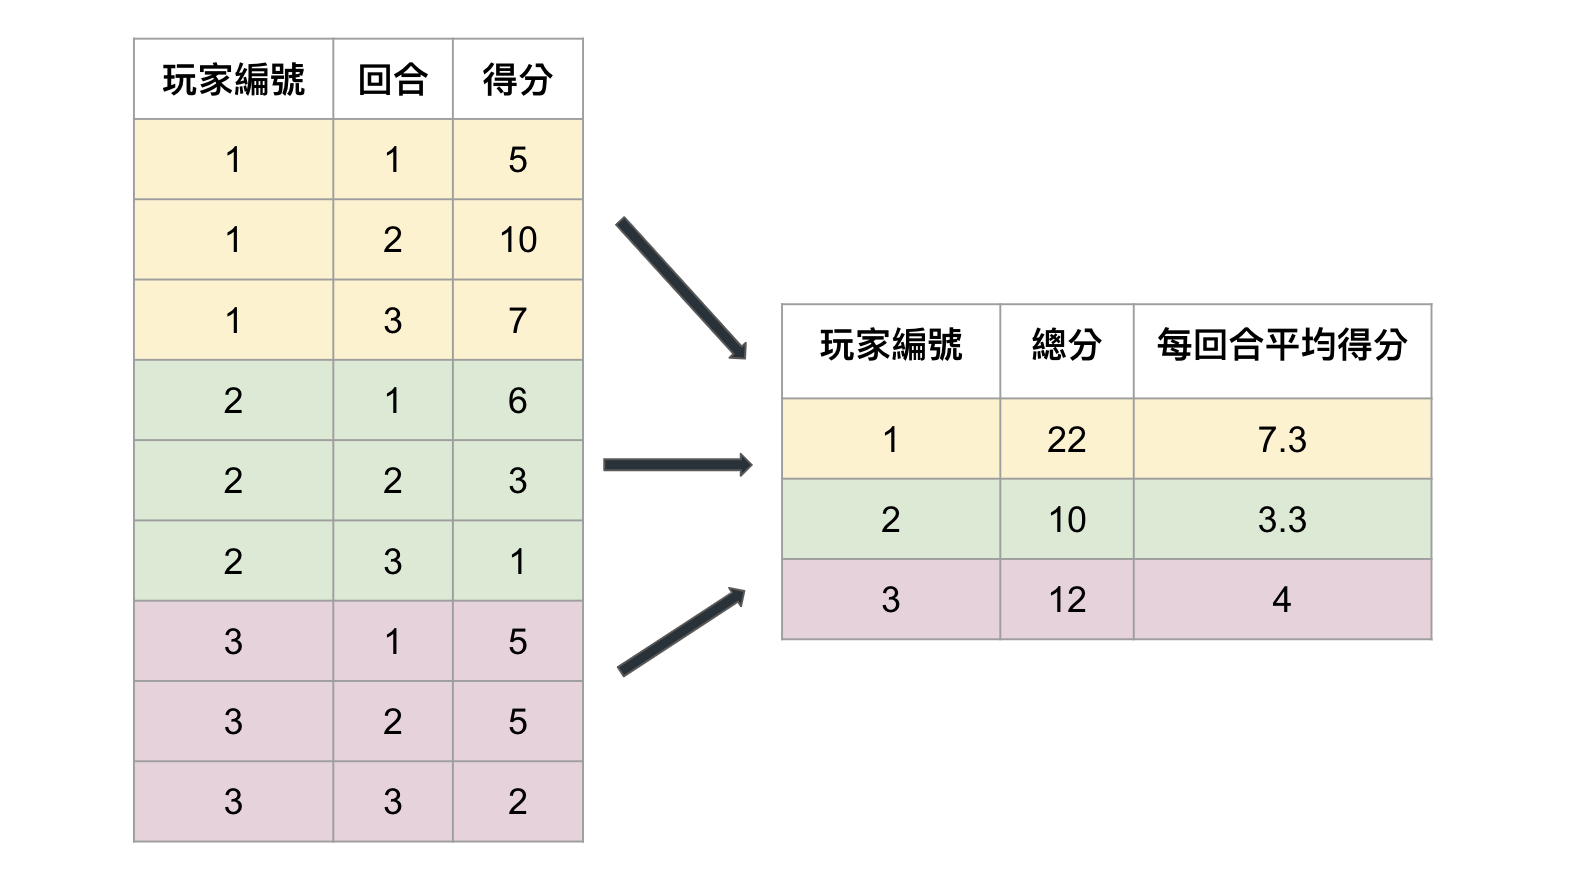

最受歡迎的前三類商品？以訂單量為例。(欄位：product_category, order_id)

In [ ]:
df.groupby('product_category')['order_id'].count().nlargest(3)

In [ ]:
# [進階] as_index=False 意思是「不將 product_category 當成 index，我想要另外用數字作為 index。」
df.groupby('product_category', as_index=False)['order_id'].count()

### 【商品二】銷售額最高的品類

【練習題】哪個品類銷售額最高？(欄位：product_category, value [USD])

### 【客戶一】VIP 客戶

誰是 VIP 客戶？以消費額為例。(欄位：value [USD], customer_id)

In [ ]:
df.head()

In [ ]:
df.groupby('customer_id')['value [USD]'].sum()   #max()  #nlargest(1)

### 【客戶二】買家人數逐日變化

【練習題】 請依序執行上方程式碼，並做出買家人數的逐日變化。(欄位：customer_id, datetime)

思考：有什麼發現呢？如何解讀？[小提示](https://www.cosmopolitan.com/tw/fashion/news/g25269511/2018-black-friday/)

### 【總體四】平日/促銷日AOV差異

將促銷日訂為 11/23 當日，其他日期皆為平日，觀察兩者的 AOV 是否呈現差異。

#### [進階] 依現有欄位新增欄位

判斷式：
    
    if condition1:
      result1
    elif condition2:
      result2
    elif condition3:
      result3
    ...
    else:
      result4

In [ ]:
# [進階] 根據現有欄位的資料新增欄位，判斷那天是平日或促銷日
def label_onsale(row):
   if row['datetime']=='2018-11-23':
      return 1
   else:
      return 0

df['blackfri'] = df.apply(label_onsale, axis=1)  # axis=1 意思是一次處理一筆 row 資料
df

【練習題】 請依序執行上方程式碼，並計算平日/促銷日的平均客單價有沒有差異？(欄位：blackfri, value [USD])

#### to_datetime(): 時間處理

也可以用程式判斷特定日期是星期幾。

In [ ]:
# 要做日期相關的分析，先對日期做資料處理，將 datetime 欄位轉成時間格式
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

In [ ]:
pd.to_datetime(df['datetime']).dt.year
pd.to_datetime(df['datetime']).dt.month
pd.to_datetime(df['datetime']).dt.day
pd.to_datetime(df['datetime']).dt.dayofweek     # 預設 Monday=0, Sunday=6

In [ ]:
# 也可以新增一個欄位把日期相關的資訊記錄下來，例如新增星期幾的欄位
# 希望新增一個欄位改成紀錄 Monday=1, Sunday=7，可以怎麼做？
df['weekday'] = pd.to_datetime(df['datetime']).dt.dayofweek + 1
df

#### df[condition]: 取特定資料

In [ ]:
df['blackfri']

In [ ]:
# 以 boolean 型態表示此條件式的判斷結果
df['blackfri'] == 1

In [ ]:
# 挑出 df 這個表格中，黑色星期五當天的資料來檢視
df[df['blackfri']==1]                          # 當 boolean == True 的時候才把該筆資料取出來，有篩選的效果
df[df['datetime']=='2018-11-23']

In [ ]:
# 挑出 2018 年 11 月 23 日當天來自 VIP 客戶的交易紀錄
cond1 = df['datetime']=='2018-11-23'               # 發生在2018年11月23日的交易
cond2 = df['customer_id']==51660                   # VIP 大戶
blackfri_vip = df[(cond1 & cond2)]                 # 先計算 boolean 的結果，再去 df 中取出最終結果為 True 的資料
blackfri_vip

【練習題】請抓出編號 35324 這位客戶所做的信用卡交易。(欄位：customer_id, payment_method)

### 【商品三】品類銷售額逐日變化

#### [進階] 多欄位分組計算

In [ ]:
df.head()

In [ ]:
df.groupby(['datetime', 'product_category'])['value [USD]'].sum()

#### merge(): 串接其他資料表


商品類別代碼實際上對應到哪個商品類別？

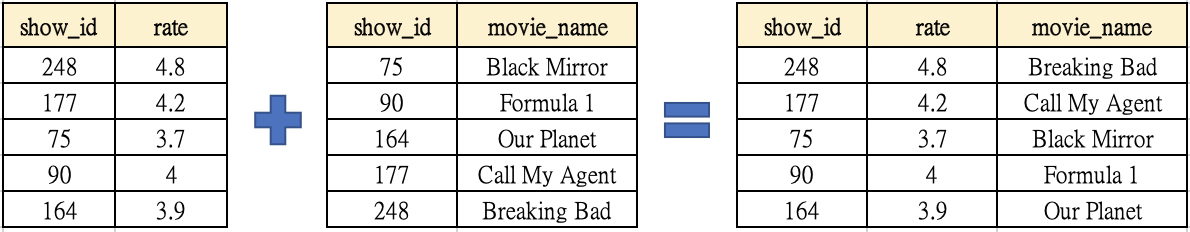

In [ ]:
!gdown --id 1a8AZi23S6dxeJk8CMkcHz3RRNJ_3SwCm

In [ ]:
category = pd.read_csv('product_category_name.csv')  
category

In [ ]:
df_with_cate = pd.merge(df, category, how='inner', on=['product_category'])  # 串接起兩張表格的資料
df_with_cate

In [ ]:
df_with_cate.info()

再做一次【商品指標三】品類銷售額的逐日變化，用品類名稱來呈現結果。

In [ ]:
df_with_cate.groupby(['datetime', 'category_name'])['value [USD]'].sum()

【練習題】哪個品類銷售額最高？用品類名稱來呈現結果。(欄位：category_name, value [USD])

## 資料呈現與匯出

### 資料排序

In [ ]:
# 類似 EXCEL 中的篩選/排序功能
df.sort_values(by='value [USD]')      
df.sort_values(by='value [USD]', ascending=False).head()

【練習題】最久逛了多久才下單？(提示：以 time_on_site [Minutes] 排序)

### 匯出檔案

1. 跑下面語法，會在左邊看到新檔案
2. 右鍵下載檔案

In [ ]:
df.to_csv('report.csv') 

## 為什麼需要資料視覺化？
1. 易於理解數據
2. 使人們更願意吸收理解資
3. 增加商業溝通效率

## 公司常用的視覺化分析平台
1. [Tableau](https://www.tableau.com/zh-tw/data-insights/dashboard-showcase)
2. [AWS Quicksight](https://aws.amazon.com/tw/quicksight/gallery/)
3. [Google Data Studio](https://marketingplatform.google.com/about/data-studio/gallery/)

## 資料視覺化工具

### [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html): plot()

做圖 - 以圓餅圖呈現 payment_method 分佈。

In [ ]:
df.groupby(['payment_method'])['order_id'].count().plot(kind='pie', autopct='%1.0f%%')

#### 【客戶二】買家人數逐日變化

做圖 - 買家人數的逐日變化。(欄位：customer_id, datetime)

In [ ]:
df.groupby(['datetime']).nunique().plot(kind='bar', y='customer_id')

#### 【商品二】銷售額最高的品類

【練習題】做圖 - 各品類的銷售額？(表格：df_with_cate, 欄位：category_name, value [USD])

#### 【商品三】品類銷售額逐日變化

做圖 - 品類銷售額的逐日變化。(表格：df_with_cate, 欄位：category_name, value [USD], datetime)

In [ ]:
# kind不定義default為折線圖
dd = df_with_cate.groupby(['datetime', 'category_name']).sum()['value [USD]']
dd.unstack().plot() #使用pandas進行數據重排，常透過unstack使groupby後的結果不要堆疊

### [Seaborn](https://seaborn.pydata.org/examples/index.html)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 主題、顏色、大小等細節都可以調整
sns.set_theme(style="darkgrid")     
colors = sns.color_palette('pastel')

In [ ]:
# 長條圖
sns.set(rc = {'figure.figsize':(4,3)})
ax = sns.barplot(x='datetime', y='customer_id', data=df)

In [ ]:
# 調整畫布大小
sns.set(rc = {'figure.figsize':(20,8)})
ax = sns.barplot(x='datetime', y='customer_id', data=df)

In [ ]:
# 調整顏色
sns.set(rc = {'figure.figsize':(35,8)}, font_scale=2)
ax = sns.barplot(x='datetime', y='customer_id', data=df, palette='rainbow')

In [ ]:
# 改變字體大小
sns.set(rc = {'figure.figsize':(35,8)}, font_scale=1)
ax = sns.barplot(x='datetime', y='customer_id', data=df, palette='rainbow') 

In [ ]:
sns.set_theme(style="whitegrid")

dd = df_with_cate.groupby(['datetime', 'category_name']).sum()['value [USD]']
dd = dd.unstack()
sns.lineplot(data=dd) #coolwarm, ocean etc

# [Airbnb Dataset]

[Airbnb投影片](https://docs.google.com/presentation/d/1uGPb-0Pgwli1tgeJvUnr7r557qVnTRJd/edit?usp=sharing&ouid=102462750398745981613&rtpof=true&sd=true)

In [ ]:
# airbnb資料
!gdown --id 18llqjZuHm7l1LZEbElsatlK2Kx_3lrzZ

In [ ]:
# Load files
df = pd.read_csv('df_final.csv')
df

In [ ]:
# 透過自己建立的colab副本環境下，學員可由此開始撰寫自己的程式碼進行資料分析

# 附錄

## 電商資料產生自訂欄位的方法

新增 order_id 欄位：
* 把 index 的數字加上 14783 之後設為一個新欄位，並將欄位名稱取名為 order_id2。
* 14783 只是一個自定義的數字，由於這份資料僅是該公司訂單資料的部份擷取，因此我將這份資料的範圍假設為第14783~39781號的訂單資料(不重複流水號)。

In [ ]:
df['order_id2'] = df.index + 14783
df

新增 prod_cnt 欄位：
* 新增一個命名為 rand_prod_cnt 的欄位，將該欄位內隨機填上介於 a~b 之間的數值。
* 使用隨機填值，需要用到 numpy 套件，語法為：np.random.randint(a, b+1, df.shape[0])
* 由於是隨機填值，因此每次長出來的數字都不一樣。

In [ ]:
import numpy as np

In [ ]:
df['rand_prod_cnt'] = np.random.randint(1, 6, df.shape[0])
df

# 參考資料

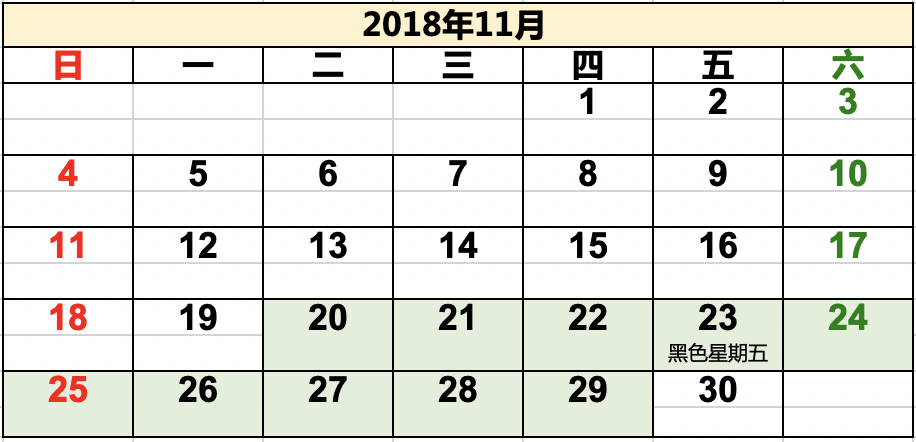

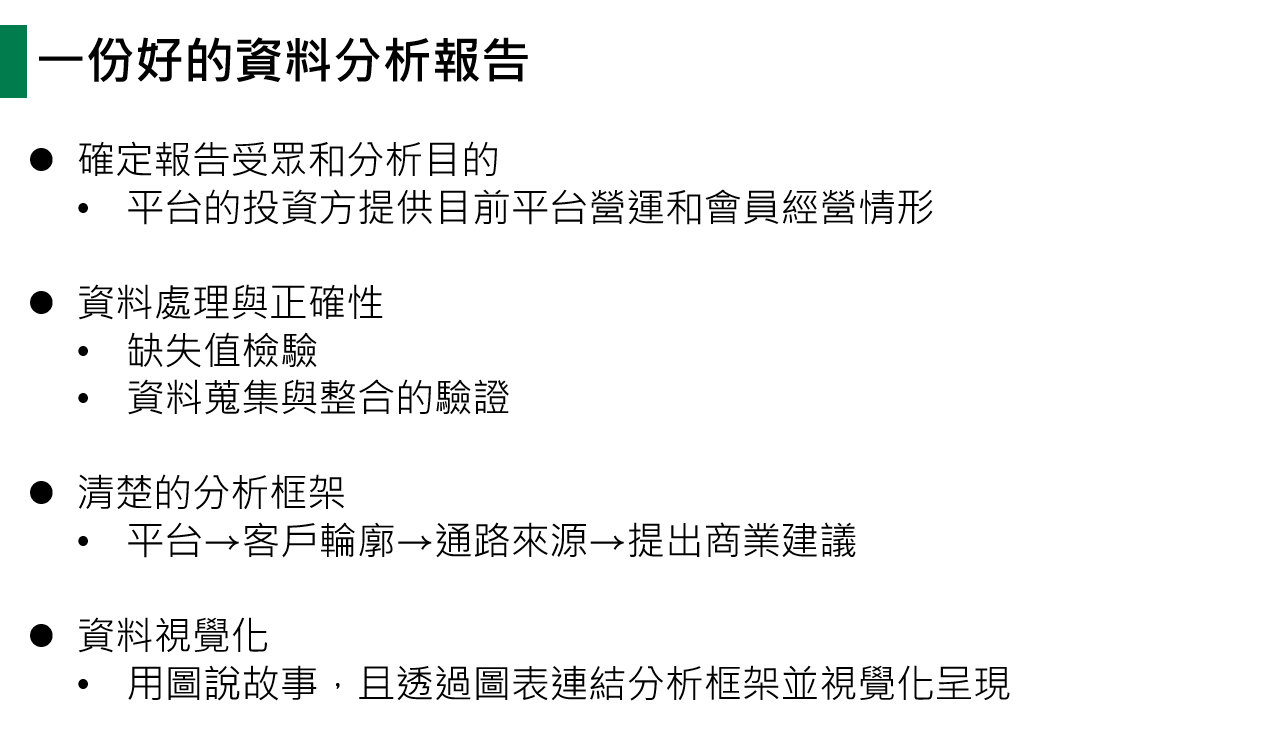